# Circuit Library 
https://qiskit.org/documentation/apidoc/circuit_library.html#module-qiskit.circuit.library



# The circuit library (qiskit 0.19)
   - Collection of valuable circuit families
    * Building blocks for algorithms
    * difficult to simulate classically
    * Useful for education
   - Library contains tests, documentation and is easily extensible
   - Qiskit Aqua works natively with this suite of circuits
   


![img](library_overview.png)

# Examples of Circuit Library usage

### *Using standard Gates* 

In [280]:
import qiskit.tools.jupyter
# %qiskit_job_watcher

In [303]:
# The single-qubit Pauli-Z gate 
# Equivalent to a 'pi' radian rotation about the Z axis.
from qiskit.circuit.library import CZGate

# we create a gate that we name 'mycz' with a label 'cz'
label='cz'
ctrl_state=0
mycz = CZGate(label=label, ctrl_state=ctrl_state)

print("This is my gate definition: " , mycz.definition)


This is my gate definition:  [[<qiskit.circuit.library.standard_gates.x.XGate object at 0x000002430C890FD0>, [Qubit(QuantumRegister(2, 'q'), 0)], []], (<qiskit.circuit.library.standard_gates.h.HGate object at 0x000002430C8E0F10>, [Qubit(QuantumRegister(2, 'q'), 1)], []), (<qiskit.circuit.library.standard_gates.x.CXGate object at 0x000002430C890850>, [Qubit(QuantumRegister(2, 'q'), 0), Qubit(QuantumRegister(2, 'q'), 1)], []), (<qiskit.circuit.library.standard_gates.h.HGate object at 0x000002430C8906A0>, [Qubit(QuantumRegister(2, 'q'), 1)], []), [<qiskit.circuit.library.standard_gates.x.XGate object at 0x000002430C890FD0>, [Qubit(QuantumRegister(2, 'q'), 0)], []]]


In [309]:
# We create a circuit and append those 2 gates 
circ = QuantumCircuit(2)
circ.append(mycz, [0,1])
circ.draw()

┌─────┐
q_0: ┤0    ├
     │  cz │
q_1: ┤1    ├
     └─────┘

In [310]:
#.decompose() does not modify original circuit
circ.decompose().draw()

┌───┐     ┌───┐
q_0: ┤ X ├──■──┤ X ├
     ├───┤┌─┴─┐├───┤
q_1: ┤ H ├┤ X ├┤ H ├
     └───┘└───┘└───┘

In [311]:
### We create a gate that is a repeat of the mycz 12 times    
mygates = mycz.repeat(12)
circ.append(mygates, [0,1])
circ.draw()


┌─────┐┌────────┐
q_0: ┤0    ├┤0       ├
     │  cz ││  cz*12 │
q_1: ┤1    ├┤1       ├
     └─────┘└────────┘

In [312]:
circ.decompose().draw()

┌───┐     ┌───┐┌─────┐┌─────┐┌─────┐┌─────┐┌─────┐┌─────┐┌─────┐┌─────┐»
q_0: ┤ X ├──■──┤ X ├┤0    ├┤0    ├┤0    ├┤0    ├┤0    ├┤0    ├┤0    ├┤0    ├»
     ├───┤┌─┴─┐├───┤│  cz ││  cz ││  cz ││  cz ││  cz ││  cz ││  cz ││  cz │»
q_1: ┤ H ├┤ X ├┤ H ├┤1    ├┤1    ├┤1    ├┤1    ├┤1    ├┤1    ├┤1    ├┤1    ├»
     └───┘└───┘└───┘└─────┘└─────┘└─────┘└─────┘└─────┘└─────┘└─────┘└─────┘»
«     ┌─────┐┌─────┐┌─────┐┌─────┐
«q_0: ┤0    ├┤0    ├┤0    ├┤0    ├
«     │  cz ││  cz ││  cz ││  cz │
«q_1: ┤1    ├┤1    ├┤1    ├┤1    ├
«     └─────┘└─────┘└─────┘└─────┘

In [284]:
# standard gates 
# from numpy import Matrix
from qiskit.circuit.library import CCXGate, HGate
_h = HGate(label='H')
_ccx = CCXGate(label='ccx')

print(_ccx.to_matrix())
print(_ccx.definition)


[[1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]]
[(<qiskit.circuit.library.standard_gates.h.HGate object at 0x0000024308A95790>, [Qubit(QuantumRegister(3, 'q'), 2)], []), (<qiskit.circuit.library.standard_gates.x.CXGate object at 0x000002430A9FD940>, [Qubit(QuantumRegister(3, 'q'), 1), Qubit(QuantumRegister(3, 'q'), 2)], []), (<qiskit.circuit.library.standard_gates.t.TdgGate object at 0x000002430A91E3D0>, [Qubit(QuantumRegister(3, 'q'), 2)], []), (<qiskit.circuit.library.standard_gates.x.CXGate object at 0x000002430A91E1C0>, [Qubit(QuantumRegister(3, 'q'), 0), Qubit(Qua

In [285]:
print(_h.to_matrix())
print(_h.definition)


[[ 0.70710678+0.j  0.70710678+0.j]
 [ 0.70710678+0.j -0.70710678+0.j]]
[(<qiskit.circuit.library.standard_gates.u2.U2Gate object at 0x000002430A5FC490>, [Qubit(QuantumRegister(1, 'q'), 0)], [])]


# Examples of Circuit Library usage

### *Using Boolean Logic Circuit*

In [37]:
# using the OR circuit
from qiskit.circuit.library import OR
import qiskit.tools.jupyter

# A circuit implementing the logical OR operation on a number of qubits (2)
circuit_or = OR(2)

In [38]:
# get informations relative to the circuit_or
%circuit_library_info circuit_or

In [39]:
# decompose the circuit one level 
%circuit_library_info circuit_or.decompose()

In [45]:
# A circuit implementing the logical XOR operation on a number of qubits (2)
from qiskit.circuit.library import XOR
circuit_xor = XOR(2, 3) # 3 is the XOR amount 
%circuit_library_info circuit_xor


In [25]:
# A circuit implementing the logical AND operation on a number of qubits (2)
from qiskit.circuit.library import AND
circuit_and = AND(2)
%circuit_library_info circuit_and

### *You can compose your circuit with those objects* 

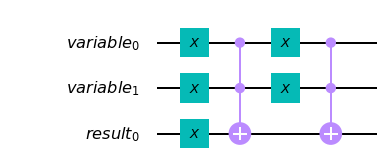

In [96]:
# compose circuit_or and circuit_and
my_circuit = circuit_or.compose(circuit_and)
my_circuit.draw(output = 'mpl')


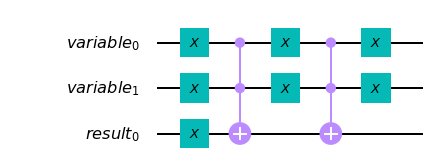

In [97]:
# add circuit_xor to the circuit
my_circuit.compose(circuit_xor).draw(output='mpl')

# Examples of Circuit Library usage
### *Using Generalized gates*

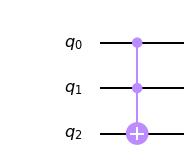

In [134]:
# example of a multi-controlled NOT gate
from qiskit.circuit.library import MCMT
circuit=MCMT('x', 2, 1)
circuit.draw(output='mpl')

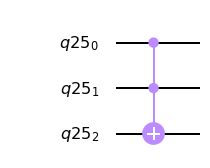

In [163]:
# Or using the standard ccx gate or the toffoli 
from qiskit import QuantumCircuit, QuantumRegister
qr = QuantumRegister(3)
qc = QuantumCircuit(qr)

# qc.ccx(q[0],q[1], q[2])

qc.toffoli(qr[0],qr[1], qr[2])

qc.draw(output='mpl')

# Examples of Circuit Library usage

### *Using Pauli Rotations and Real Amplitudes*

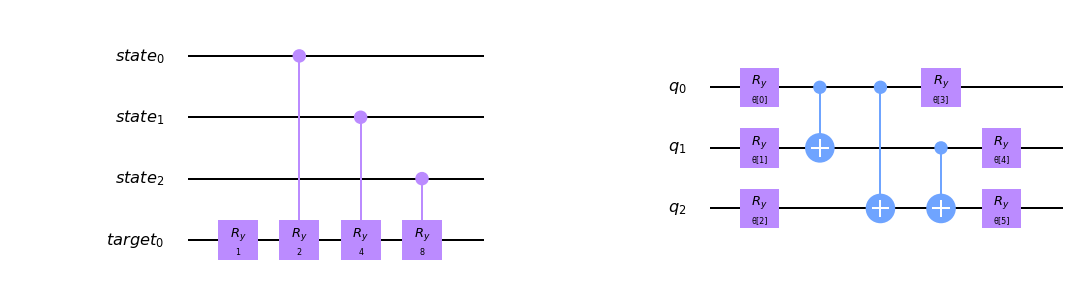

In [292]:
from qiskit.circuit.library import LinearPauliRotations, RealAmplitudes
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=1, ncols=2)

# Create a new linear rotation circuit
pauli_rotations = LinearPauliRotations(3, offset=1, slope=2)

# The `RealAmplitudes` circuit is a heuristic trial wave function used as Ansatz in
# chemistry applications or classification circuits in machine learning. 
# The circuit consists of alternating layers of `Y` rotations and `CX` entanglements.
wavefunction = RealAmplitudes(3, reps=1)

# draw of the circuits 
pauli_rotations.draw(output='mpl', ax=ax[0])
wavefunction.draw(output='mpl',scale=2,  ax=ax[1])

# Examples of Circuit Library usage
### *Basis Change Circuits*


In [269]:
# Quantum Fourier Transform 
from qiskit.circuit.library import QFT
qft = QFT(3, insert_barriers=True)


In [270]:
print('Operations:', qft.count_ops())
print('Depth:', qft.depth(), 'width:', qft.width())


Operations: OrderedDict([('h', 3), ('cu1', 3), ('barrier', 3), ('swap', 1)])
Depth: 7 width: 3


### *These objects are circuits!*

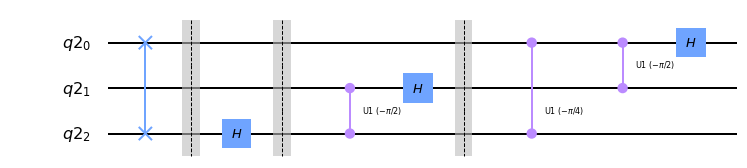

In [271]:
qft.inverse().draw(output='mpl')

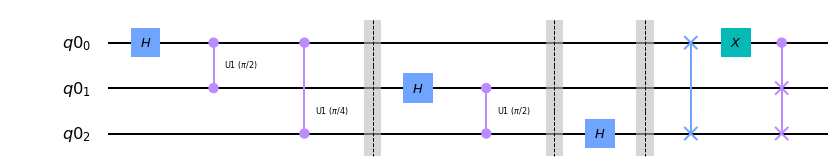

In [266]:
qft.x(0)
qft.cswap(0, 1, 2)
qft.draw(output='mpl')

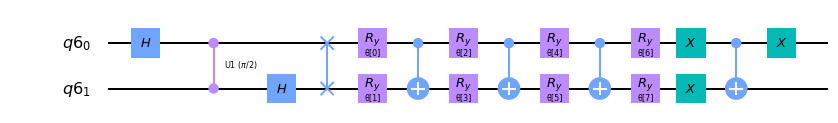

In [275]:
my_circuit = QFT(2).compose(RealAmplitudes(2)).compose(OR(1))
my_circuit.draw(output='mpl')

# Algorithm Workflow 

![img](./algorithm_flow.png)

### *what moved to the Circuit Library*

![img](./what_moved.png)

## *Now it's your turn to play!*
<div class="alert alert-block alert-info">
<b>Note:</b>
Here's a challenge for you: Implement the circuit below using the Circuit Library gates. 
    
  - Note: the "Control R" gates are "Control Phase shift" gates
</div>

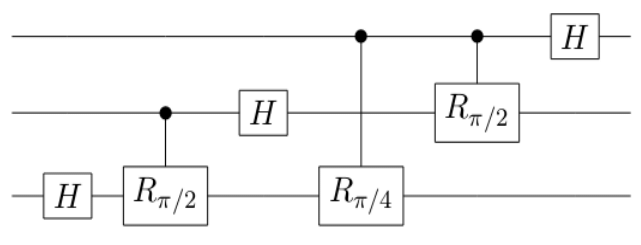

<div class="alert alert-success">
<b>Challenge solution</b>

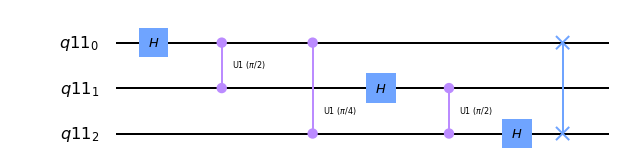

In [29]:
# The circuit represents a Quantum Fourier Transform. 
# Pretty easy to implement using Circuit Library from Qiskit 
import numpy as np
from qiskit import QuantumCircuit
from qiskit.circuit.library import QFT

qft = QFT(3, insert_barriers=False)

qft.draw(output='mpl')

In [36]:
# The control U1 gate can be decomposed in CNOT and U1 gates
circuit = QuantumCircuit(3)
circuit.cx(0,1)
circuit.u1(np.pi/4, 1)
circuit.cx(0,1)
circuit.draw()

q_0: ──■────────────────■──
     ┌─┴─┐┌──────────┐┌─┴─┐
q_1: ┤ X ├┤ U1(pi/4) ├┤ X ├
     └───┘└──────────┘└───┘
q_2: ──────────────────────

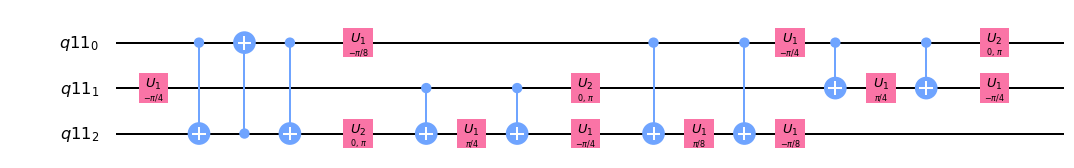

In [30]:
qft.inverse().decompose().draw(output='mpl')